In [1]:
import pandas as pd
from plotnine import *
from plotnine.options import set_option, figure_size
set_option('base_family',  'Arial')

'Dejavu Sans'

In [2]:
t4 = pd.read_csv('table_4.csv', sep='&')
t4

Method     MAP    P@10   P@100  P@1000    R@10   R@100  R@1000  \
0       BM25-BOW  0.0936  0.0949  0.0421  0.0137  0.0943  0.3372  0.7767   
1        QLM-BOW  0.2672  0.2744  0.0813  0.0163  0.2453  0.5483  0.8612   
2        SDR-BOW  0.2663  0.2897  0.0815  0.0159  0.2592  0.5390  0.8529   
3        AES-BOW  0.1886  0.1949  0.0690  0.0165  0.1815  0.4619  0.8595   
4      AES-BOW-P  0.1950  0.2026  0.0700  0.0162  0.1906  0.4755  0.8530   
5    SDR-BOW-AES  0.2572  0.2513  0.0787  0.0164  0.2297  0.5210  0.8675   
6  SDR-BOW-AES-P  0.2546  0.2487  0.0779  0.0164  0.2343  0.5224  0.8666   

   nDCG@10  nDCG@100  nDCG@1000    LR\%  
0   0.1175    0.2074     0.3469  0.7389  
1   0.3490    0.4269     0.5326  0.5236  
2   0.3503    0.4212     0.5244  0.5672  
3   0.2466    0.3366     0.4668  0.5921  
4   0.2548    0.3459     0.4700  0.5514  
5   0.3271    0.4136     0.5271  0.5521  
6   0.3266    0.4121     0.5245  0.5298

In [4]:
t4_long = pd.melt(t4, id_vars=['Method'], var_name='Measure', value_name='Effectiveness')
t4_long

t4_long["Method"] = t4_long["Method"].astype("category")
t4_long['Method'].cat.reorder_categories(['BM25-BOW', 'QLM-BOW', 'SDR-BOW',
                                          'AES-BOW', 'AES-BOW-P', 'SDR-BOW-AES', 'SDR-BOW-AES-P'], inplace=True)
t4_long

/var/folders/kz/kt7xbd4s2c7fjv16c3s3g18c0000gp/T/ipykernel_86150/3715214648.py:5: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.


Method Measure  Effectiveness
0        BM25-BOW     MAP         0.0936
1         QLM-BOW     MAP         0.2672
2         SDR-BOW     MAP         0.2663
3         AES-BOW     MAP         0.1886
4       AES-BOW-P     MAP         0.1950
..            ...     ...            ...
72        SDR-BOW    LR\%         0.5672
73        AES-BOW    LR\%         0.5921
74      AES-BOW-P    LR\%         0.5514
75    SDR-BOW-AES    LR\%         0.5521
76  SDR-BOW-AES-P    LR\%         0.5298

[77 rows x 3 columns]

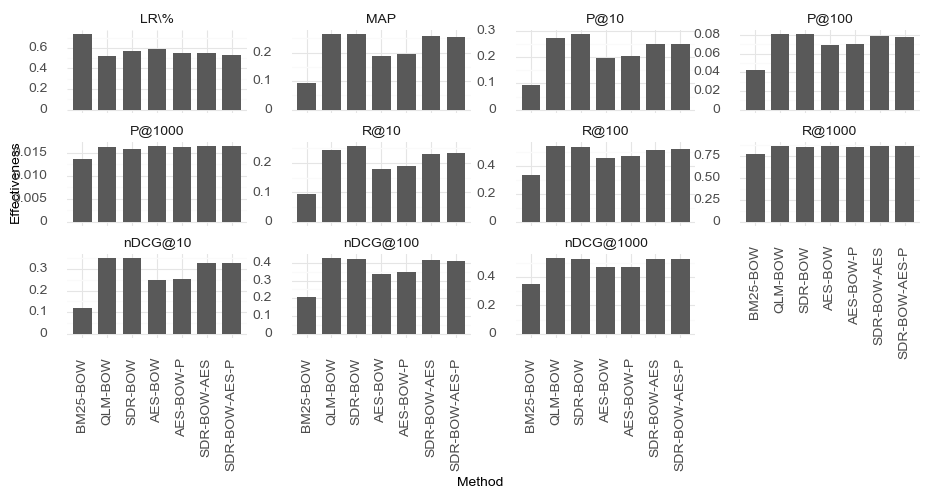

<ggplot: (8795543963510)>

In [27]:
p = ggplot(t4_long, aes(x='Method', y='Effectiveness')) \
+ theme_minimal() \
+ theme(axis_text_x=element_text(rotation=90), text=element_text(size=10))\
+ theme(legend_position='top', legend_box_margin=0, legend_title=element_blank())\
+ scale_fill_discrete(guide=False) \
+ theme(figure_size=(11,4), subplots_adjust={'wspace': 0.25}) \
+ geom_col(width = .75)\
+ facet_wrap('Measure', scales="free_y")
p

In [28]:
p.save('table4.pdf')

/opt/homebrew/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 11 x 4 in image.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: table4.pdf


/Users/s4558151/.local/share/virtualenvs/graph-YHCcnWgb/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


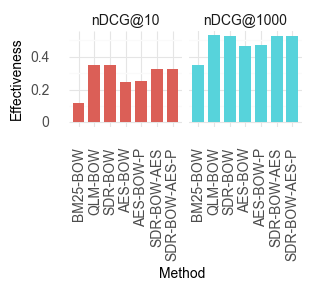

<ggplot: (322695346)>

In [6]:
p = ggplot(t4_long.query('Measure == "nDCG@10" | Measure =="nDCG@1000"'), aes(x='Method', y='Effectiveness', fill='Measure')) \
+ theme_minimal() \
+ theme(axis_text_x=element_text(rotation=90), text=element_text(size=10))\
+ theme(legend_position='top', legend_box_margin=0, legend_title=element_blank())\
+ scale_fill_discrete(guide=False) \
+ theme(figure_size=(3,1.25)) \
+ geom_col(width = .75)\
+ facet_wrap('Measure')
p

In [7]:
p.save('table_4-map.pdf')

/Users/s4558151/.local/share/virtualenvs/graph-YHCcnWgb/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 3 x 1.25 in image.
/Users/s4558151/.local/share/virtualenvs/graph-YHCcnWgb/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: table_4-map.pdf
/Users/s4558151/.local/share/virtualenvs/graph-YHCcnWgb/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
